In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import statistics

from konlpy.tag import Twitter
from konlpy.utils import pprint
twitter = Twitter()
from collections import Counter

pd.set_option('max_colwidth', 500)

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:3: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:3: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: n

In [2]:
common_front = '../../dataset/go_0715/gogosing_' 
common_back = '.json'

def get_file(file_num):   
    file_path = common_front + str(file_num) + common_back
    json_data = open(file_path).read()
    data = json.loads(json_data)
    df_data = pd.DataFrame(data)
    return df_data


# 74번 파일이 에러가 나서 제외함
def concat_file(file_num):
    start_file = pd.DataFrame(get_file(1))
    for i in range(2,file_num+1):
        if( i == 74):
            continue
        df_tmp = pd.DataFrame(get_file(i))
        start_file = pd.concat([start_file, df_tmp])
    start_file = start_file.reset_index(drop=True)
    return start_file

In [3]:
go_data = concat_file(156)

In [3]:
len(go_data)

772829

In [4]:
 # 소수점 아래 3자리까지 나타내기, 4째자리에서 반올림
def short_float(val):
    value = float("{:.4f}".format(val))
    return value


In [211]:
def print_group(title, groups, used_func):
    pivot_num = 0.1
    save_list = list()

    pprint(title)
    cur_num = 0.0
    for i, group in enumerate(groups):
        save_list.append(used_func(group))
        print('group ' + str(i + 1) + ' = ' + str(float("{:.1f}".format(cur_num))) + str(' over ') + str(
            float("{:.1f}".format(cur_num + pivot_num))) + str(' under : '), save_list[i])
        cur_num += pivot_num
    print('\n')

    return save_list

In [5]:
import pandas as pd
import numpy as np
np.random.seed(0)
from konlpy.tag import Twitter
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

twitter=Twitter()
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [475]:
# tokenizer : 문장에서 색인어 추출을 위해 정해진 품사의 단어만 뽑아서 normalization, stemming 처리하도록 함
def token(raw, pos=["Noun","Alpha","Verb","Number","Adjective","KoreanParticle",
                        "Punctuation","Determiner", "Adverb", "Conjunction","Excalmation", "Foreign"], stopword=[]):
    return [
        word for word, tag in twitter.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
        
          if len(word) >=1 and tag in pos and word not in stopword

        ]



In [481]:
d=[u'두개구매하고 사은품으로 받앗어요! 아직 써보딘않앗지만 잘사용하겟습니다~~!!',u'예쁜데 생각보다 약간 짧네요']
arr=tfidf(d)
arr

fit_transform, (No.review 2, feature 16)
          !      ~~!!         개        구매         두        받다        사은   생각  \
0  0.288675  0.288675  0.288675  0.288675  0.288675  0.288675  0.288675  0.0   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.5   

      써보딘않앗        아직   약간  예쁘다        용다        자다   짧다         품  
0  0.288675  0.288675  0.0  0.0  0.288675  0.288675  0.0  0.288675  
1  0.000000  0.000000  0.5  0.5  0.000000  0.000000  0.5  0.000000  


array([[0.28867513, 0.28867513, 0.28867513, 0.28867513, 0.28867513,
        0.28867513, 0.28867513, 0.        , 0.28867513, 0.28867513,
        0.        , 0.        , 0.28867513, 0.28867513, 0.        ,
        0.28867513],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ,
        0.5       , 0.5       , 0.        , 0.        , 0.5       ,
        0.        ]])

In [451]:
vectorize= TfidfVectorizer(
    tokenizer=token,
    sublinear_tf=True    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
)

In [446]:
# 1.
#reviewer의 desc를 담는 리스트
def make_reviews(cid):
    desc=(go_data.loc[go_data['cId']==cid])['desc']
    desc=list(desc)
    
    return desc


In [494]:
#2. 리뷰들을 tf-idf 적용하여 벡터화
def tfidf(desc):
    X = vectorize.fit_transform(desc)
    print('fit_transform, (No.review {}, feature {})'.format(X.shape[0], X.shape[1]))
    features = vectorize.get_feature_names()
    
  #  print (pd.DataFrame(data=X.toarray(), columns=features))
    vector_array=X.toarray()
    
    return vector_array

In [495]:
#3. 유사도 구하기222222222
def similarity(vector_arr,desc):   
    sm=[] #한 리뷰어의 리뷰 유사도를 담을 리스트
    max_cnt=0 #리뷰 유사도 최대값이 0.9 이상 count
    _sum=0
    _mid=0
    cnt=0
    for i in range(len(desc)-1):
        srch_vector= vectorize.transform([desc[i]])
        for j in range(i+1, len(desc)):
            cosine_similar =cosine_similarity(srch_vector, [vector_arr[j]]).flatten()
            cosine_similar=short_float(float(cosine_similar))
            print ("cosine_similar ") + str(i+1) + str(' 번째 리뷰와') + str(j+1) + str(' 번째 리뷰 : ') + str(cosine_similar)
            sm.append(cosine_similar)


   # pprint(u'유사도 리스트'),;print (sm)

    sm.sort(reverse=True)
    _min=min(sm)
    _mid=statistics.median(sm) # 유사도의 중간값
    _max=max(sm)
    _sum=sum(sm)

    if(_max>=0.9):
        max_cnt+=1
        
    avg= short_float(_sum/len(sm))
    
    
  #  print ('min : ', _min)
  #  print ('mid : ', _mid)
  #  print('max : ', _max)
    print('avg : ', avg)
   # print('num of 1 : ', cnt)
    print('# similarity over 0.9 : ', max_cnt)
    
    return sm


In [173]:
len(spammer)

26

In [272]:
def make_groups(_list):
    group1=0
    group2=0
    group3=0
    group4=0
    group5=0
    group6=0
    group7=0
    group8=0
    group9=0
    group10=0
    
    for i in range(len(_list)):
        if(_list[i]<0.1):
            group1+=1
        elif(_list[i]>=0.1 and _list[i]< 0.2):
            group2+=1
        elif(_list[i] >=0.2 and _list[i]< 0.3):
            group3+=1
        elif(_list[i] >=0.3 and _list[i]< 0.4):
            group4+=1
        elif(_list[i]>=0.4 and _list[i]< 0.5):
            group5+=1
        elif(_list[i]>=0.5 and _list[i] < 0.6):
            group6+=1
        elif(_list[i]>=0.6 and _list[i] < 0.7):
            group7+=1
        elif(_list[i]>=0.7 and _list[i]< 0.8):
            group8+=1
        elif(_list[i]>=0.8 and _list[i]< 0.9):
            group9+=1
        elif(_list[i]>=0.9):
            group10+=1
        
    groups=[group1, group2, group3, group4, group5, group6,group7,group8,group9,group10 ]
    
    return groups

In [261]:
def print_want_val(sm_list,used_func):
    val=(used_func(sm_list))
   
    return val

In [504]:
for i in range(1):
    print str(i+1) + str('번째 리뷰어: ')+ str('slvj**')
    reviews=make_reviews('slvj**')
    if(len(reviews)<2):
        continue
    vector_array=tfidf(reviews)
    sm=similarity(vector_array, reviews)

  
    result_max= print_want_val(sm, lambda x: np.percentile(sm,100)) # 최대값 반환 
    print ("max: ", result_max)
    
    result_q3 = print_want_val(sm, lambda x: np.percentile(sm,75)) #상위 25%
    print("3rd quartile: ", result_q3)   
    
    
    result_mid = print_want_val(sm, lambda x: np.percentile(sm,50)) # 중간값 반환 
    print ("median: ", result_mid)
   
    
    result_q1 = print_want_val(sm, lambda x: np.percentile(sm,25)) # 상위 75%
    print("1st quartile: ", result_q1)
  
    print(np.mean(sm))

    print("\n")
    

1번째 리뷰어: slvj**
fit_transform, (No.review 10, feature 138)
cosine_similar 1 번째 리뷰와2 번째 리뷰 : 0.1218
cosine_similar 1 번째 리뷰와3 번째 리뷰 : 0.1817
cosine_similar 1 번째 리뷰와4 번째 리뷰 : 0.0396
cosine_similar 1 번째 리뷰와5 번째 리뷰 : 0.0838
cosine_similar 1 번째 리뷰와6 번째 리뷰 : 0.0482
cosine_similar 1 번째 리뷰와7 번째 리뷰 : 0.063
cosine_similar 1 번째 리뷰와8 번째 리뷰 : 0.1647
cosine_similar 1 번째 리뷰와9 번째 리뷰 : 0.0328
cosine_similar 1 번째 리뷰와10 번째 리뷰 : 0.0702
cosine_similar 2 번째 리뷰와3 번째 리뷰 : 0.1699
cosine_similar 2 번째 리뷰와4 번째 리뷰 : 0.067
cosine_similar 2 번째 리뷰와5 번째 리뷰 : 0.0653
cosine_similar 2 번째 리뷰와6 번째 리뷰 : 0.0932
cosine_similar 2 번째 리뷰와7 번째 리뷰 : 0.0384
cosine_similar 2 번째 리뷰와8 번째 리뷰 : 0.2138
cosine_similar 2 번째 리뷰와9 번째 리뷰 : 0.0737
cosine_similar 2 번째 리뷰와10 번째 리뷰 : 0.1623
cosine_similar 3 번째 리뷰와4 번째 리뷰 : 0.0208
cosine_similar 3 번째 리뷰와5 번째 리뷰 : 0.113
cosine_similar 3 번째 리뷰와6 번째 리뷰 : 0.0483
cosine_similar 3 번째 리뷰와7 번째 리뷰 : 0.0308
cosine_similar 3 번째 리뷰와8 번째 리뷰 : 0.2528
cosine_similar 3 번째 리뷰와9 번째 리뷰 : 0.0773
cosine_similar 3 번째 리뷰

    유사도 분포도 - 유사도 최대값 , 중간값, 상위 25%(q3), 상위 75%(q1)
    
    sapmmer : 리뷰어들의 cid가 있는 리스트

In [378]:
max_list=[]
mid_list=[]
q1_list=[]
q3_list=[]

for i in range(len(spammer)):
    print str(i+1) + str('번째 리뷰어: ')+ str(spammer[i])
    reviews=make_reviews(spammer[i])
    if(len(reviews)<2):
        continue
    vector_array=tfidf(reviews)
    sm=similarity(vector_array, reviews)

  
    result_max= print_want_val(sm, lambda x: np.percentile(sm,100)) # 최대값 반환 
    print ("max: ", result_max)
    max_list.append(result_max)
    
    result_mid = print_want_val(sm, lambda x: np.percentile(sm,50)) # 중간값 반환 
    print ("median: ", result_mid)
    mid_list.append(result_mid)
    
    result_q1 = print_want_val(sm, lambda x: np.percentile(sm,25)) # 상위 75%
    print("1st quartile: ", result_q1)
    q1_list.append(result_q1)
    
    result_q3 = print_want_val(sm, lambda x: np.percentile(sm,75)) #상위 25%
    print("3rd quartile: ", result_q3)         
    q3_list.append(result_q3)


    print("\n")
    
groups_max=make_groups(max_list)
groups_mid=make_groups(mid_list)
groups_q1=make_groups(q1_list)
groups_q3=make_groups(q3_list)

1번째 리뷰어: asdfg18**
fit_transform, (No.review 59, feature 598)
('avg : ', 0.0949)
('# similarity over 0.9 : ', 1)
('max: ', 1.0)
('median: ', 0.0796)
('1st quartile: ', 0.05315)
('3rd quartile: ', 0.1231)


2번째 리뷰어: ghkal04**
fit_transform, (No.review 55, feature 364)
('avg : ', 0.113)
('# similarity over 0.9 : ', 1)
('max: ', 0.9306)
('median: ', 0.1008)
('1st quartile: ', 0.0629)
('3rd quartile: ', 0.147)


3번째 리뷰어: rladmswl9708**
fit_transform, (No.review 308, feature 911)
('avg : ', 0.0623)
('# similarity over 0.9 : ', 0)
('max: ', 0.4936)
('median: ', 0.05075)
('1st quartile: ', 0.024)
('3rd quartile: ', 0.0875)


4번째 리뷰어: leeliast**
fit_transform, (No.review 125, feature 1285)
('avg : ', 0.0786)
('# similarity over 0.9 : ', 1)
('max: ', 1.0)
('median: ', 0.06995000000000001)
('1st quartile: ', 0.0384)
('3rd quartile: ', 0.1089)


5번째 리뷰어: rhdms10**
fit_transform, (No.review 54, feature 325)
('avg : ', 0.1092)
('# similarity over 0.9 : ', 0)
('max: ', 0.7973)
('median: ', 0.0866)
(

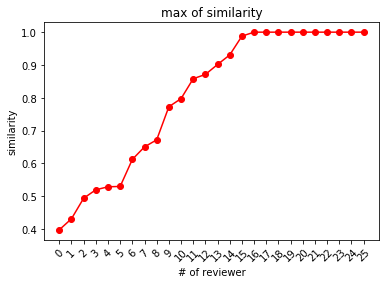

In [381]:
x=np.arange(len(max_list))
y=sorted(max_list)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('max of similarity')
plt.xlabel("# of reviewer")
plt.ylabel("similarity")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()

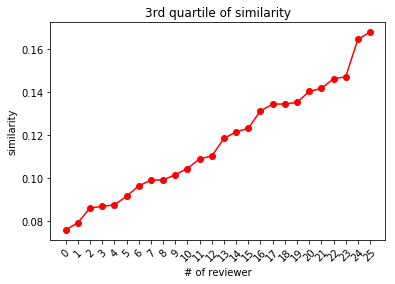

In [382]:
x=np.arange(len(q3_list))
y=sorted(q3_list)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('3rd quartile of similarity')
plt.xlabel("# of reviewer")
plt.ylabel("similarity")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()

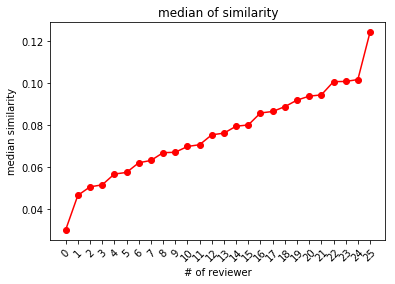

In [383]:
x=np.arange(len(mid_list))
y=sorted(mid_list)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('median of similarity')
plt.xlabel("# of reviewer")
plt.ylabel("median similarity")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()

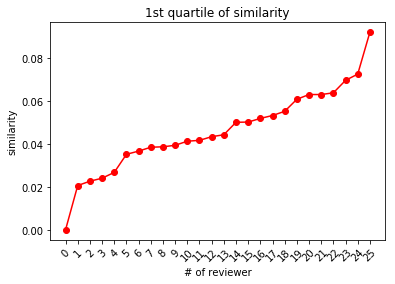

In [384]:
x=np.arange(len(q1_list))
y=sorted(q1_list)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('1st quartile of similarity')
plt.xlabel("# of reviewer")
plt.ylabel("similarity")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()

In [282]:
groups_mid

[22, 4, 0, 0, 0, 0, 0, 0, 0, 0]

In [395]:
result_len = print_group(u'해당 그룹별 spammer 수', groups_max, lambda x: x)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups_max, lambda x: float("{:.1f}".format(1.0 * (x) * 100 / len(spammer))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 0)
('group 2 = 0.1 over 0.2 under : ', 0)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 1)
('group 5 = 0.4 over 0.5 under : ', 2)
('group 6 = 0.5 over 0.6 under : ', 3)
('group 7 = 0.6 over 0.7 under : ', 3)
('group 8 = 0.7 over 0.8 under : ', 2)
('group 9 = 0.8 over 0.9 under : ', 2)
('group 10 = 0.9 over 1.0 under : ', 13)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 0.0)
('group 2 = 0.1 over 0.2 under : ', 0.0)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 3.8)
('group 5 = 0.4 over 0.5 under : ', 7.7)
('group 6 = 0.5 over 0.6 under : ', 11.5)
('group 7 = 0.6 over 0.7 under : ', 11.5)
('group 8 = 0.7 over 0.8 under : ', 7.7)
('group 9 = 0.8 over 0.9 under : ', 7.7)
('group 10 = 0.9 over 1.0 under : ', 50.0)




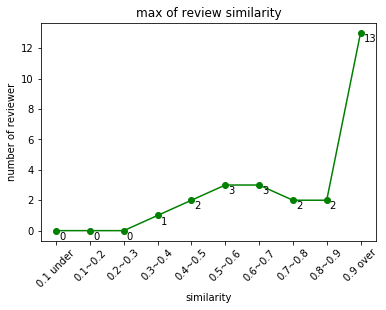

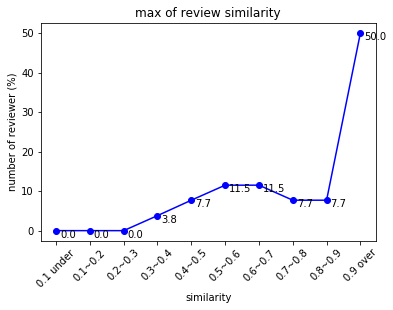

In [396]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('max of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('max of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

In [387]:
result_len = print_group(u'해당 그룹별 spammer 수', groups_q3, lambda x: x)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups_q3, lambda x: float("{:.1f}".format(1.0 * (x) * 100 / len(spammer))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 9)
('group 2 = 0.1 over 0.2 under : ', 17)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 0)
('group 5 = 0.4 over 0.5 under : ', 0)
('group 6 = 0.5 over 0.6 under : ', 0)
('group 7 = 0.6 over 0.7 under : ', 0)
('group 8 = 0.7 over 0.8 under : ', 0)
('group 9 = 0.8 over 0.9 under : ', 0)
('group 10 = 0.9 over 1.0 under : ', 0)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 34.6)
('group 2 = 0.1 over 0.2 under : ', 65.4)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 0.0)
('group 5 = 0.4 over 0.5 under : ', 0.0)
('group 6 = 0.5 over 0.6 under : ', 0.0)
('group 7 = 0.6 over 0.7 under : ', 0.0)
('group 8 = 0.7 over 0.8 under : ', 0.0)
('group 9 = 0.8 over 0.9 under : ', 0.0)
('group 10 = 0.9 over 1.0 under : ', 0.0)




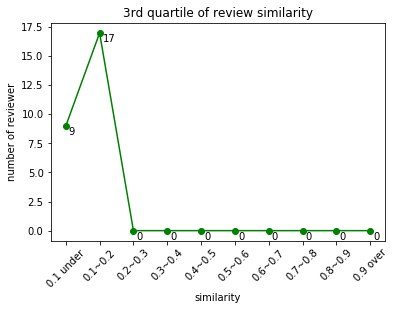

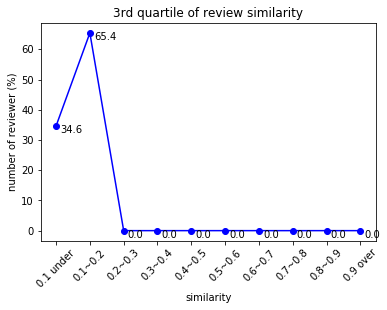

In [388]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('3rd quartile of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('3rd quartile of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

In [389]:
result_len = print_group(u'해당 그룹별 spammer 수', groups_mid, lambda x: x)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups_mid, lambda x: float("{:.1f}".format(1.0 * (x) * 100 / len(spammer))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 22)
('group 2 = 0.1 over 0.2 under : ', 4)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 0)
('group 5 = 0.4 over 0.5 under : ', 0)
('group 6 = 0.5 over 0.6 under : ', 0)
('group 7 = 0.6 over 0.7 under : ', 0)
('group 8 = 0.7 over 0.8 under : ', 0)
('group 9 = 0.8 over 0.9 under : ', 0)
('group 10 = 0.9 over 1.0 under : ', 0)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 84.6)
('group 2 = 0.1 over 0.2 under : ', 15.4)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 0.0)
('group 5 = 0.4 over 0.5 under : ', 0.0)
('group 6 = 0.5 over 0.6 under : ', 0.0)
('group 7 = 0.6 over 0.7 under : ', 0.0)
('group 8 = 0.7 over 0.8 under : ', 0.0)
('group 9 = 0.8 over 0.9 under : ', 0.0)
('group 10 = 0.9 over 1.0 under : ', 0.0)




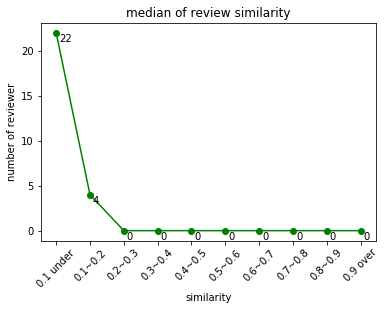

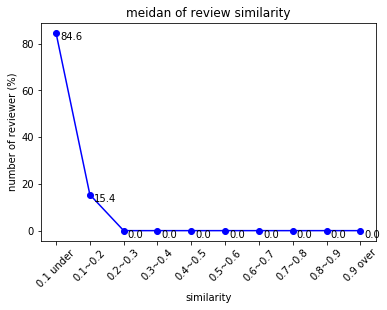

In [390]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('median of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('meidan of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

In [391]:
result_len = print_group(u'해당 그룹별 spammer 수', groups_q1, lambda x: x)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups_q1, lambda x: float("{:.1f}".format(1.0 * (x) * 100 / len(spammer))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 26)
('group 2 = 0.1 over 0.2 under : ', 0)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 0)
('group 5 = 0.4 over 0.5 under : ', 0)
('group 6 = 0.5 over 0.6 under : ', 0)
('group 7 = 0.6 over 0.7 under : ', 0)
('group 8 = 0.7 over 0.8 under : ', 0)
('group 9 = 0.8 over 0.9 under : ', 0)
('group 10 = 0.9 over 1.0 under : ', 0)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 100.0)
('group 2 = 0.1 over 0.2 under : ', 0.0)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 0.0)
('group 5 = 0.4 over 0.5 under : ', 0.0)
('group 6 = 0.5 over 0.6 under : ', 0.0)
('group 7 = 0.6 over 0.7 under : ', 0.0)
('group 8 = 0.7 over 0.8 under : ', 0.0)
('group 9 = 0.8 over 0.9 under : ', 0.0)
('group 10 = 0.9 over 1.0 under : ', 0.0)




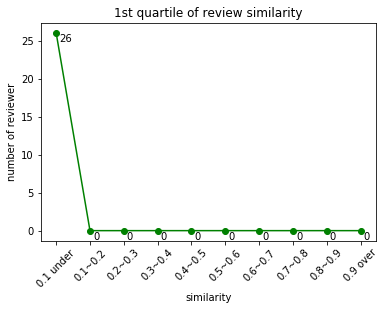

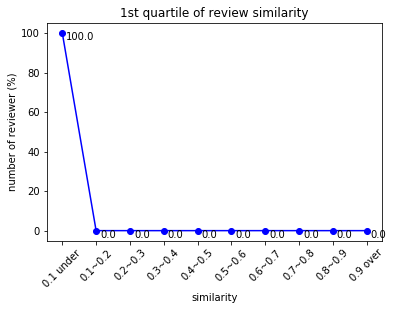

In [392]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('1st quartile of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('1st quartile of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

유사도 분포도 - 유사도 최대값

In [139]:
group1=[]
group2=[]
group3=[]
group4=[]
group5=[]
group6=[]
group7=[]
group8=[]
group9=[]
group10=[]
max_list=[]
_max=0

for i in range(len(spammer)):
    print str(i+1) + str('번째 리뷰어: ')+ str(spammer[i])
    reviews=make_reviews(spammer[i])
    if(len(reviews)<2):
        continue
    vector_array=tfidf(reviews)
    sm=similarity(vector_array, reviews)
    _max=max(sm)
    max_list.append(_max)
    
    if(_max<0.1):
        group1.append(spammer[i])
    elif(_max>=0.1 and _max< 0.2):
        group2.append(spammer[i])
    elif(_max>=0.2 and _max< 0.3):
        group3.append(spammer[i])
    elif(_max >=0.3 and _max < 0.4):
        group4.append(spammer[i])
    elif(_max>=0.4 and _max < 0.5):
        group5.append(spammer[i])
    elif(_max>=0.5 and _max < 0.6):
        group6.append(spammer[i])
    elif(_max>=0.6 and _max < 0.7):
        group7.append(spammer[i])
    elif(_max>=0.7 and _max < 0.8):
        group8.append(spammer[i])
    elif(_max>=0.8 and _max < 0.9):
        group9.append(spammer[i])
    elif(_max>=0.9):
        group10.append(spammer[i])

1번째 리뷰어: asdfg18**
fit_transform, (No.review 59, feature 598)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0949)
('num of 1 : ', 4)
('# max_cnt : ', 1)
2번째 리뷰어: ghkal04**
fit_transform, (No.review 55, feature 364)
('min : ', 0.0)
('max : ', 0.9306)
('avg : ', 0.113)
('num of 1 : ', 0)
('# max_cnt : ', 1)
3번째 리뷰어: rladmswl9708**
fit_transform, (No.review 308, feature 911)
('min : ', 0.0)
('max : ', 0.4936)
('avg : ', 0.0623)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4번째 리뷰어: leeliast**
fit_transform, (No.review 125, feature 1285)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0786)
('num of 1 : ', 1)
('# max_cnt : ', 1)
5번째 리뷰어: rhdms10**
fit_transform, (No.review 54, feature 325)
('min : ', 0.0)
('max : ', 0.7973)
('avg : ', 0.1092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6번째 리뷰어: sally70**
fit_transform, (No.review 63, feature 510)
('min : ', 0.0233)
('max : ', 1.0)
('avg : ', 0.1198)
('num of 1 : ', 4)
('# max_cnt : ', 1)
7번째 리뷰어: m0928hy**
fit_transform, (No.review 61, feature 580)
('min 

In [140]:
len(max_list)

26

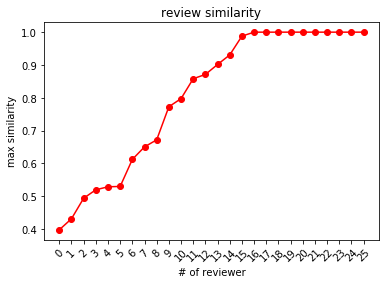

In [142]:
x=np.arange(len(max_list))
y=sorted(max_list)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('review similarity')
plt.xlabel("# of reviewer")
plt.ylabel("max similarity")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()

In [119]:
groups=[group1, group2, group3, group4, group5, group6,group7,group8,group9,group10 ]
result_len = print_group(u'해당 그룹별 spammer 수', groups, len)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups, lambda x: float("{:.1f}".format(1.0 * len(x) * 100 / len(spammer))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 0)
('group 2 = 0.1 over 0.2 under : ', 0)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 1)
('group 5 = 0.4 over 0.5 under : ', 2)
('group 6 = 0.5 over 0.6 under : ', 3)
('group 7 = 0.6 over 0.7 under : ', 3)
('group 8 = 0.7 over 0.8 under : ', 2)
('group 9 = 0.8 over 0.9 under : ', 2)
('group 10 = 0.9 over 1.0 under : ', 13)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 0.0)
('group 2 = 0.1 over 0.2 under : ', 0.0)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 3.8)
('group 5 = 0.4 over 0.5 under : ', 7.7)
('group 6 = 0.5 over 0.6 under : ', 11.5)
('group 7 = 0.6 over 0.7 under : ', 11.5)
('group 8 = 0.7 over 0.8 under : ', 7.7)
('group 9 = 0.8 over 0.9 under : ', 7.7)
('group 10 = 0.9 over 1.0 under : ', 50.0)




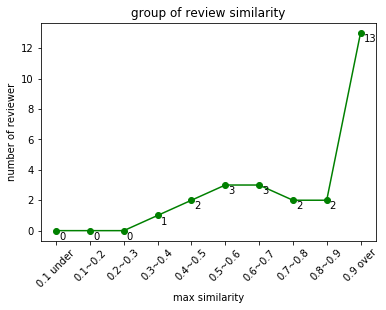

In [120]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('group of review similarity')
plt.xlabel("max similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

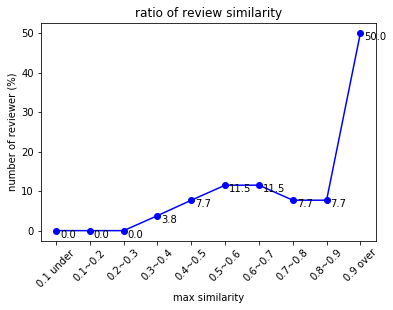

In [113]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('ratio of review similarity')
plt.xlabel("max similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

In [121]:
group10

[u'asdfg18**',
 u'ghkal04**',
 u'leeliast**',
 u'sally70**',
 u'm0928hy**',
 u'yeji04**',
 u'sejin1**',
 u'yjyim**',
 u'wjswldms0**',
 u'jy03**',
 u'seoa40**',
 u'acua**',
 u'wertyuio9**']

# 형태소 품사 분석

In [313]:
spammer_desc=[]
for i in range(len(spammer)):
    spammer_desc.append(make_reviews(spammer[i]))

In [314]:
len(spammer_desc)

26

In [317]:
pprint (spammer_desc[:5])

[[예쁘네요 하트 귀엽고다만 일짜로 떨어지는게그냥 막대기식으로 고정 돼 있었으면..어땠을까 하는 ㅎㅎ자꾸 꾸깃꾸깃 되는 것 같아서ㅎㅎ 그래도 흔치않고 예뻐용,
  예뻐요 맘에들어요 막 부담스러운 노출이 아니라서 괜찮은것 같아요 배송도 나름평균적으로 온 것같고! 흰색도 예쁠 것 같아요굿굿!,
  음 생각보다는 별로였아요 약간 쫀쫀한 줄인둘 알았는데 어깨부분에 비해서 밑에는 살짝 라인들아가게만든가같은데 별로였어요 ㅜ 저렴한가격에득템해서 그냥 입으렵니다....! 배송은 조금 늦었지만 그래도 잘 왔어요~~~ 나름 괜찮네용,
  예뻐욤,
  니트 세일하는거중에 이 옷이 제일로 마음에들었어요 진짜 부드럽고 따뜻했어요 묵직한 부드러움이 아닝 가벼운 부드러움과 따뜻함이라서 진짜 좋았아요 색상별로 다 사고싶운 생각이 드네요.. 다른 니트 말고 이 나트를 색상별로 살걸 그랬는 후회중이네요! 고고싱 옷은 많은 옷들이 어깨선이 밑으로 쳐져서 더 붕떠보인 느낌이 들어서요.. 그렇지 않은 옷중에 괜찮은 옷입니다 이옷!,
  모델이 입은거 보고 샀는데 생각보다 크네요... 많이 큰느낌 ! 그래도 묵직하니 따뜻할거 같긴 해요 색상도 따뜻해 보이고 마음에 드네요~ 이옷에 저렴한 가격으로 득템해서 좋네요~~ 다만 어깨부붐이 밑으로 안내려오고 사이즈별로 어깨넓이에 맞춰져있으면 합니다 ㅜㅜ..,
  귀엽네용 잘산가같아용~ 지금은 너무더운.. 가을에 잘 입겠습니다 이정도 퀄리티에 저렴하게 갯 한것같어요 따뜻할거같아요 귀엽기도 하고요 예쁘게 잘 입겠습니다!!!! 배송은 조금 느렸지만 저렴하게 예쁜옷 받아서 좋네요 감사합니다~,
  예쁘네요 나름 색상이~ 근데 어찌보면 살짝 촌스러워 보이기도 하고.. 파랑 입어보고 예뻐서 샀는데 흠... 그래도 저렴항 가격에 득템했어용! 잘  매치해서 입으면 예쁠것같기도 하네용!!! 색상이 더 다양하고 재고도 많았으면 좋았을것같았습니다!,
  길이감도 예쁘고 색상도 마음이 드는데 통이 너무넓어서 아쉬웠습니다..그래서 저는 수선집에 보냈어요~ 후기는 수선 안한 상태고요

In [319]:
spammer_desc= [y for x in spammer_desc for y in x]
pprint(spammer_desc[:6])

[예쁘네요 하트 귀엽고다만 일짜로 떨어지는게그냥 막대기식으로 고정 돼 있었으면..어땠을까 하는 ㅎㅎ자꾸 꾸깃꾸깃 되는 것 같아서ㅎㅎ 그래도 흔치않고 예뻐용,
 예뻐요 맘에들어요 막 부담스러운 노출이 아니라서 괜찮은것 같아요 배송도 나름평균적으로 온 것같고! 흰색도 예쁠 것 같아요굿굿!,
 음 생각보다는 별로였아요 약간 쫀쫀한 줄인둘 알았는데 어깨부분에 비해서 밑에는 살짝 라인들아가게만든가같은데 별로였어요 ㅜ 저렴한가격에득템해서 그냥 입으렵니다....! 배송은 조금 늦었지만 그래도 잘 왔어요~~~ 나름 괜찮네용,
 예뻐욤,
 니트 세일하는거중에 이 옷이 제일로 마음에들었어요 진짜 부드럽고 따뜻했어요 묵직한 부드러움이 아닝 가벼운 부드러움과 따뜻함이라서 진짜 좋았아요 색상별로 다 사고싶운 생각이 드네요.. 다른 니트 말고 이 나트를 색상별로 살걸 그랬는 후회중이네요! 고고싱 옷은 많은 옷들이 어깨선이 밑으로 쳐져서 더 붕떠보인 느낌이 들어서요.. 그렇지 않은 옷중에 괜찮은 옷입니다 이옷!,
 모델이 입은거 보고 샀는데 생각보다 크네요... 많이 큰느낌 ! 그래도 묵직하니 따뜻할거 같긴 해요 색상도 따뜻해 보이고 마음에 드네요~ 이옷에 저렴한 가격으로 득템해서 좋네요~~ 다만 어깨부붐이 밑으로 안내려오고 사이즈별로 어깨넓이에 맞춰져있으면 합니다 ㅜㅜ..]


In [325]:
split_n_desc=[]
for i in range(len(spammer_desc)):
    split_n_desc+= (twitter.pos(spammer_desc[i], norm=True, stem=True))
    
    
# pos tagging frequencies for split_n_desc
k_pos = []
k_tag_count = [] 
for i in split_n_desc:
    k_pos.append(i[1])

k_pos = list(set(k_pos))

k_data = dict(Counter(elem[1] for elem in split_n_desc))

n_table= pd.DataFrame(index = ['spammer리뷰 품사'],
                     columns = k_pos,
                     data = k_data)

n_table=n_table.T
n_table

,spammer리뷰 품사
Adjective,19058
Noun,67781
Verb,22744
Suffix,1514
Josa,25546
Punctuation,13298
KoreanParticle,5059
Adverb,4188
Determiner,1492
VerbPrefix,1307


In [327]:
n_table.sort_values(by='spammer리뷰 품사', ascending=False)

,spammer리뷰 품사
Noun,67781
Josa,25546
Verb,22744
Adjective,19058
Punctuation,13298
KoreanParticle,5059
Adverb,4188
Number,1944
Suffix,1514
Determiner,1492
